# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_score, recall_score, f1_score

# Loading the trainig and testing dataset and doing some preprocessing 

You can find the dataset in the linkbelow

dataset link: https://www.kaggle.com/datasets/kartik2112/fraud-detection

In [2]:
train_path = 'Credit card Fraud detection dataset/fraudTrain.csv'
test_path = 'Credit card Fraud detection dataset/fraudTest.csv'

In [3]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [4]:
# Handle missing data if any missing value exsist 
train_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)

In [5]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [7]:
test_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


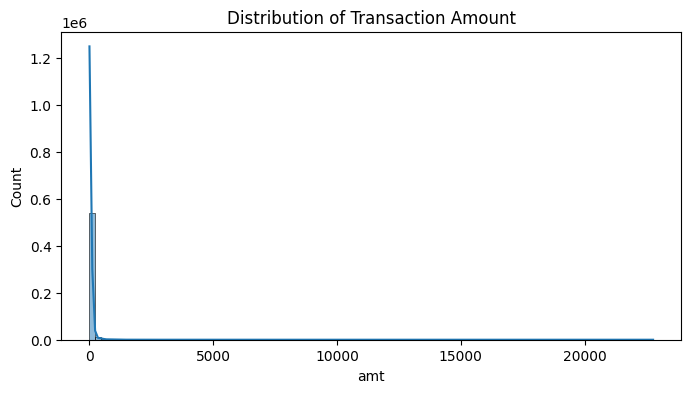

In [8]:
plt.figure(figsize=(8, 4))
sns.histplot(test_df['amt'], bins=100, kde=True)
plt.title('Distribution of Transaction Amount')
plt.show()

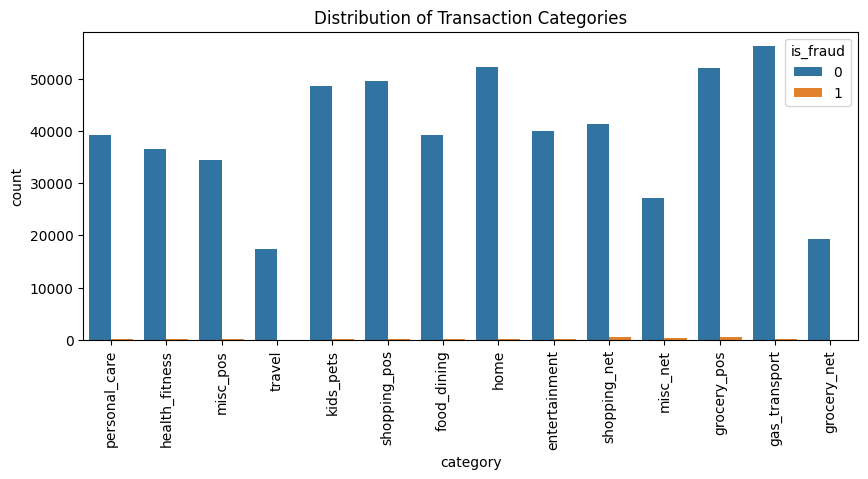

In [9]:
plt.figure(figsize=(10, 4))
sns.countplot(data=test_df, hue='is_fraud', x='category')
plt.title('Distribution of Transaction Categories')
plt.xticks(rotation=90)
plt.show()

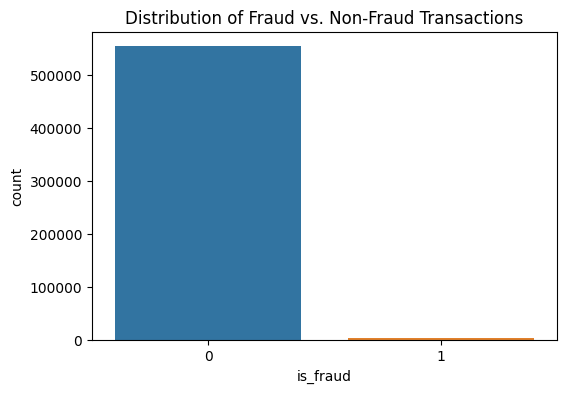

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(data=test_df, x='is_fraud')
plt.title('Distribution of Fraud vs. Non-Fraud Transactions')
plt.show()

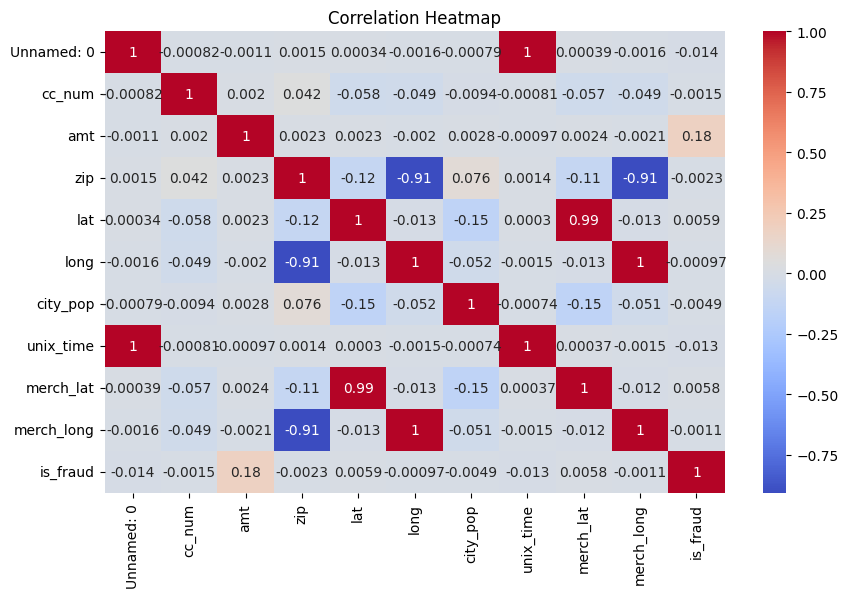

In [11]:
correlation_matrix = test_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
#after visulizing the data i think that these below features are not important so i am going to drop these features

In [13]:
columns_to_scale = ['amt', 'lat', 'long','city_pop', 'unix_time', 'merch_lat', 'merch_long']

In [14]:
scaler = StandardScaler()
scaled_training_features = scaler.fit_transform(train_df[columns_to_scale])

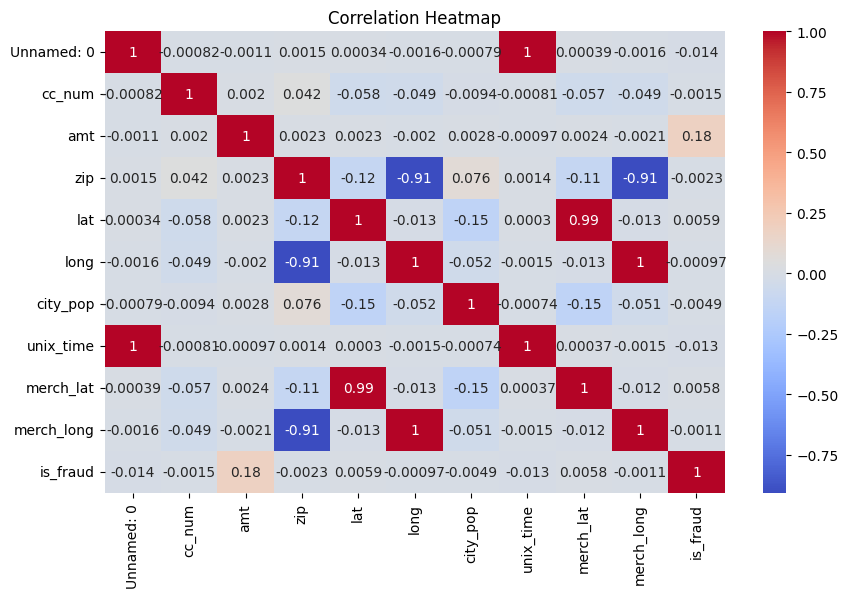

In [15]:
correlation_matrix = test_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [16]:
# Encode categorical variables from trainig data
label_encoder = LabelEncoder()
categorical_columns = ['merchant', 'category', 'gender', 'job','city', 'state', 'street']
for col in categorical_columns:
    train_df[col] = label_encoder.fit_transform(train_df[col])

In [17]:
categorical_columns_to_drop = ['Unnamed: 0', 'dob', 'first', 'last', 'trans_num']

In [18]:
train_df.drop(columns=categorical_columns_to_drop, inplace=True)

In [19]:
train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'])
train_df['year'] = train_df['trans_date_trans_time'].dt.year
train_df['month'] = train_df['trans_date_trans_time'].dt.month
train_df['hour'] = train_df['trans_date_trans_time'].dt.hour
train_df['minute'] = train_df['trans_date_trans_time'].dt.minute
train_df['second'] = train_df['trans_date_trans_time'].dt.second

In [20]:
train_df = train_df.drop('trans_date_trans_time', axis=1)

In [21]:
train_df

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,...,job,unix_time,merch_lat,merch_long,is_fraud,year,month,hour,minute,second
0,2703186189652095,514,8,4.97,0,568,526,27,28654,36.0788,...,370,1325376018,36.011293,-82.048315,0,2019,1,0,0,18
1,630423337322,241,4,107.23,0,435,612,47,99160,48.8878,...,428,1325376044,49.159047,-118.186462,0,2019,1,0,0,44
2,38859492057661,390,0,220.11,1,602,468,13,83252,42.1808,...,307,1325376051,43.150704,-112.154481,0,2019,1,0,0,51
3,3534093764340240,360,2,45.00,1,930,84,26,59632,46.2306,...,328,1325376076,47.034331,-112.561071,0,2019,1,0,1,16
4,375534208663984,297,9,41.96,1,418,216,45,24433,38.4207,...,116,1325376186,38.674999,-78.632459,0,2019,1,0,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,499,0,15.56,1,154,330,44,84735,37.7175,...,215,1371816728,36.841266,-111.690765,0,2020,6,12,12,8
1296671,6011149206456997,2,1,51.70,1,856,813,20,21790,39.2667,...,360,1371816739,38.906881,-78.246528,0,2020,6,12,12,19
1296672,3514865930894695,599,1,105.93,1,158,346,32,88325,32.9396,...,308,1371816752,33.619513,-105.130529,0,2020,6,12,12,32
1296673,2720012583106919,509,1,74.90,1,433,471,41,57756,43.3526,...,485,1371816816,42.788940,-103.241160,0,2020,6,12,13,36


In [22]:
# Encode categorical variables from testing data
for col in categorical_columns:
    test_df[col] = label_encoder.fit_transform(test_df[col])

In [23]:
scaled_testing_features = scaler.fit_transform(test_df[columns_to_scale])

In [24]:
test_df.drop(columns=categorical_columns_to_drop, inplace=True)

In [25]:
test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'])
test_df['year'] = test_df['trans_date_trans_time'].dt.year
test_df['month'] = test_df['trans_date_trans_time'].dt.month
test_df['hour'] = test_df['trans_date_trans_time'].dt.hour
test_df['minute'] = test_df['trans_date_trans_time'].dt.minute
test_df['second'] = test_df['trans_date_trans_time'].dt.second

In [26]:
test_df = test_df.drop('trans_date_trans_time', axis=1)

In [27]:
test_df

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,...,job,unix_time,merch_lat,merch_long,is_fraud,year,month,hour,minute,second
0,2291163933867244,319,10,2.86,1,341,157,39,29209,33.9659,...,275,1371816865,33.986391,-81.200714,0,2020,6,12,14,25
1,3573030041201292,591,10,29.84,0,354,16,43,84002,40.3207,...,392,1371816873,39.450498,-109.960431,0,2020,6,12,14,33
2,3598215285024754,611,5,41.28,0,865,61,33,11710,40.6729,...,259,1371816893,40.495810,-74.196111,0,2020,6,12,14,53
3,3591919803438423,222,9,60.05,1,320,764,8,32780,28.5697,...,407,1371816915,28.812398,-80.883061,0,2020,6,12,15,15
4,3526826139003047,292,13,3.19,1,548,247,21,49632,44.2529,...,196,1371816917,44.959148,-85.884734,0,2020,6,12,15,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,507,5,43.77,1,531,443,23,63453,40.4931,...,460,1388534347,39.946837,-91.333331,0,2020,12,23,59,7
555715,3556613125071656,264,7,111.84,1,540,401,42,77566,29.0393,...,198,1388534349,29.661049,-96.186633,0,2020,12,23,59,9
555716,6011724471098086,496,7,86.88,0,126,104,46,99323,46.1966,...,294,1388534355,46.658340,-119.715054,0,2020,12,23,59,15
555717,4079773899158,75,13,7.99,1,663,476,12,83643,44.6255,...,58,1388534364,44.470525,-117.080888,0,2020,12,23,59,24


In [28]:
# lets Split the training data into features (X_train) and the target variable (y_train)
X_train = train_df.drop(columns=['is_fraud'])
y_train = train_df['is_fraud']

In [29]:
# Lets Split the testing data into features (X_test) and the target variable (y_test)
X_test = test_df.drop(columns=['is_fraud'])
y_test = test_df['is_fraud']

In [30]:
# Oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
# Undersampling
random_undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
# Fit and transform the training data
X_train_resampled_oversmapled, Y_train_resampled_oversmapled = smote.fit_resample(X_train, y_train)
X_train_resampled_Undersampled, Y_train_resampled_Undersampled = random_undersampler.fit_resample(X_train, y_train)

# Using Logistic Regression

In [31]:
logistic_regression = LogisticRegression(solver='saga', max_iter=1000)

In [32]:
logistic_regression.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='saga')

In [33]:
logistic_regression_pred = logistic_regression.predict(X_test)

# Using Random Forest Classifier

In [34]:
random_forest = RandomForestClassifier()

In [35]:
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
random_forest_pred = random_forest.predict(X_test)

# Using Decision Tree Classifier

In [37]:
decision_tree = DecisionTreeClassifier()

In [38]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
decision_tree_pred = decision_tree.predict(X_test)

# Results Comparison 

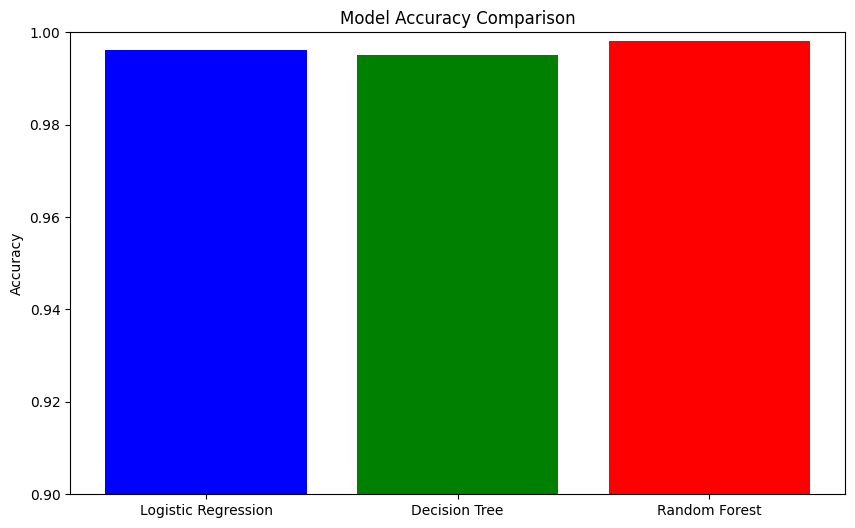

In [41]:
accuracies = [accuracy_score(y_test, logistic_regression_pred), accuracy_score(y_test, decision_tree_pred), accuracy_score(y_test, random_forest_pred)]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim([0.9, 1])  # Assuming accuracy is between 0.9 and 1
plt.show()

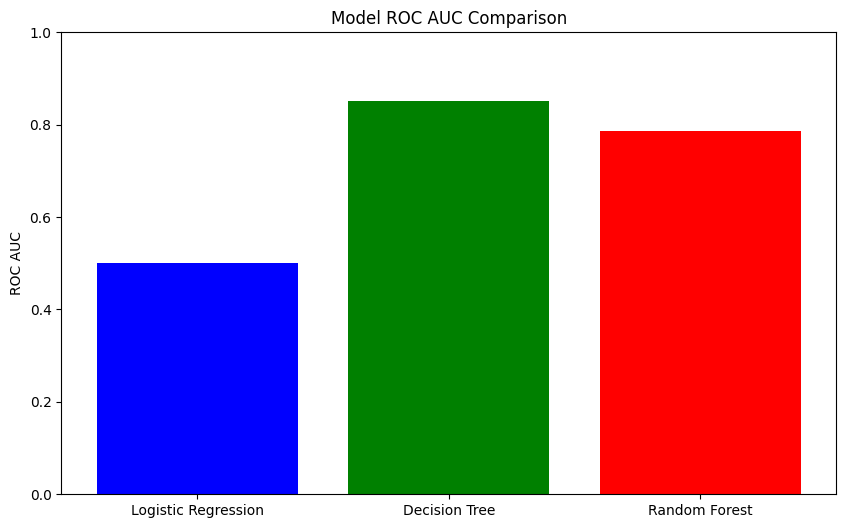

In [42]:
roc_auc_values = [roc_auc_score(y_test, logistic_regression_pred), roc_auc_score(y_test, decision_tree_pred), roc_auc_score(y_test, random_forest_pred)]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

plt.figure(figsize=(10, 6))
plt.bar(model_names, roc_auc_values, color=['blue', 'green', 'red'])
plt.title("Model ROC AUC Comparison")
plt.ylabel("ROC AUC")
plt.ylim([0, 1])  # Assuming ROC AUC is between 0 and 1
plt.show()

C:\Users\Ahmad Ansari\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


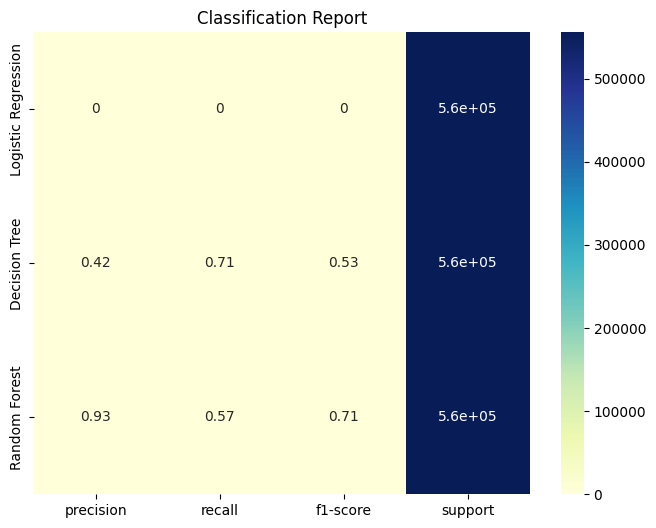

In [43]:
classification_rep_dict = {
    'Logistic Regression': {
        'precision': precision_score(y_test, logistic_regression_pred),
        'recall': recall_score(y_test, logistic_regression_pred),
        'f1-score': f1_score(y_test, logistic_regression_pred),
        'support': len(y_test)
    },
    'Decision Tree': {
        'precision': precision_score(y_test, decision_tree_pred),
        'recall': recall_score(y_test, decision_tree_pred),
        'f1-score': f1_score(y_test, decision_tree_pred),
        'support': len(y_test)
    },
    'Random Forest': {
        'precision': precision_score(y_test, random_forest_pred),
        'recall': recall_score(y_test, random_forest_pred),
        'f1-score': f1_score(y_test, random_forest_pred),
        'support': len(y_test)
    }
}

# Create a DataFrame from the dictionary
classification_rep_df = pd.DataFrame(classification_rep_dict).transpose()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(classification_rep_df, annot=True, cmap="YlGnBu")
plt.title("Classification Report")
plt.show()

In [45]:
results_df = pd.DataFrame({
    'Original': test_df['is_fraud'], 
    'Decision_Tree_Predicted': decision_tree_pred,
    'Logistic_Regression_Predicted': logistic_regression_pred,
    'Random_Forest_Predicted': random_forest_pred
})

In [46]:
# Saving the DataFrame to a CSV file
results_df.to_csv('predicted_results.csv', index=False)

(Results and Discussions):
-----------------------------------------------------------------------------
-->Accuracy:
---
99.81 percent was the highest accuracy for random forest, and 99.61 percent for logistic regression  was not far behind.

-->Precision and Recall:
---
For class 1, logistic regression produced relatively poor recall and precision. This indicates that it misses a large number of affirmative cases and produces relatively false positive mistakes. With a comparatively stronger recall for class 1, the decision tree achieved a better balance between precision and recall. Although it did it with somewhat less precision than the decision tree, random forest also managed to attain a better balance.

-->F1-Score:
---
The decision tree for class 1 has the greatest F1-score, demonstrating a superior fraud detection trade-off between recall and precision.

-->ROC AUC:
---
With a ROC AUC of 85.57%, the decision tree demonstrated the best class discrimination. The ROC AUC of random forest was lower (77.43%), indicating that it is less successful in class distinction. For logistic regression, the ROC AUC is 0.5%.

Conclusions:
---
Since missing a fraudulent transaction is more important than occasionally detecting a genuine transaction, we would normally prioritise models with stronger recall for class 1 (fraud detection) in this particular context (credit card fraud detection). With a strong recall, F1-score, and ROC AUC, the decision tree model seems to be the best option based on the metrics supplied.
I have tried to train the models on the oversampled and undersampled data but the results gone worse, so i just try to not complicate the results and train the model without them(oversampling and undersampling).